In [60]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix

Import data into memory

In [61]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Look at basic information about the different features

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

Note that URL is of type 'object', meaning numerical investigation techniques will not work on it

Below we briefly look at the dimension of this dataset

In [63]:
print("Dimension of the data: ", df.shape)

no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (39644, 61)
No. of Rows: 39644
No. of Columns: 61


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a350f2a90>,
      dtype=object)

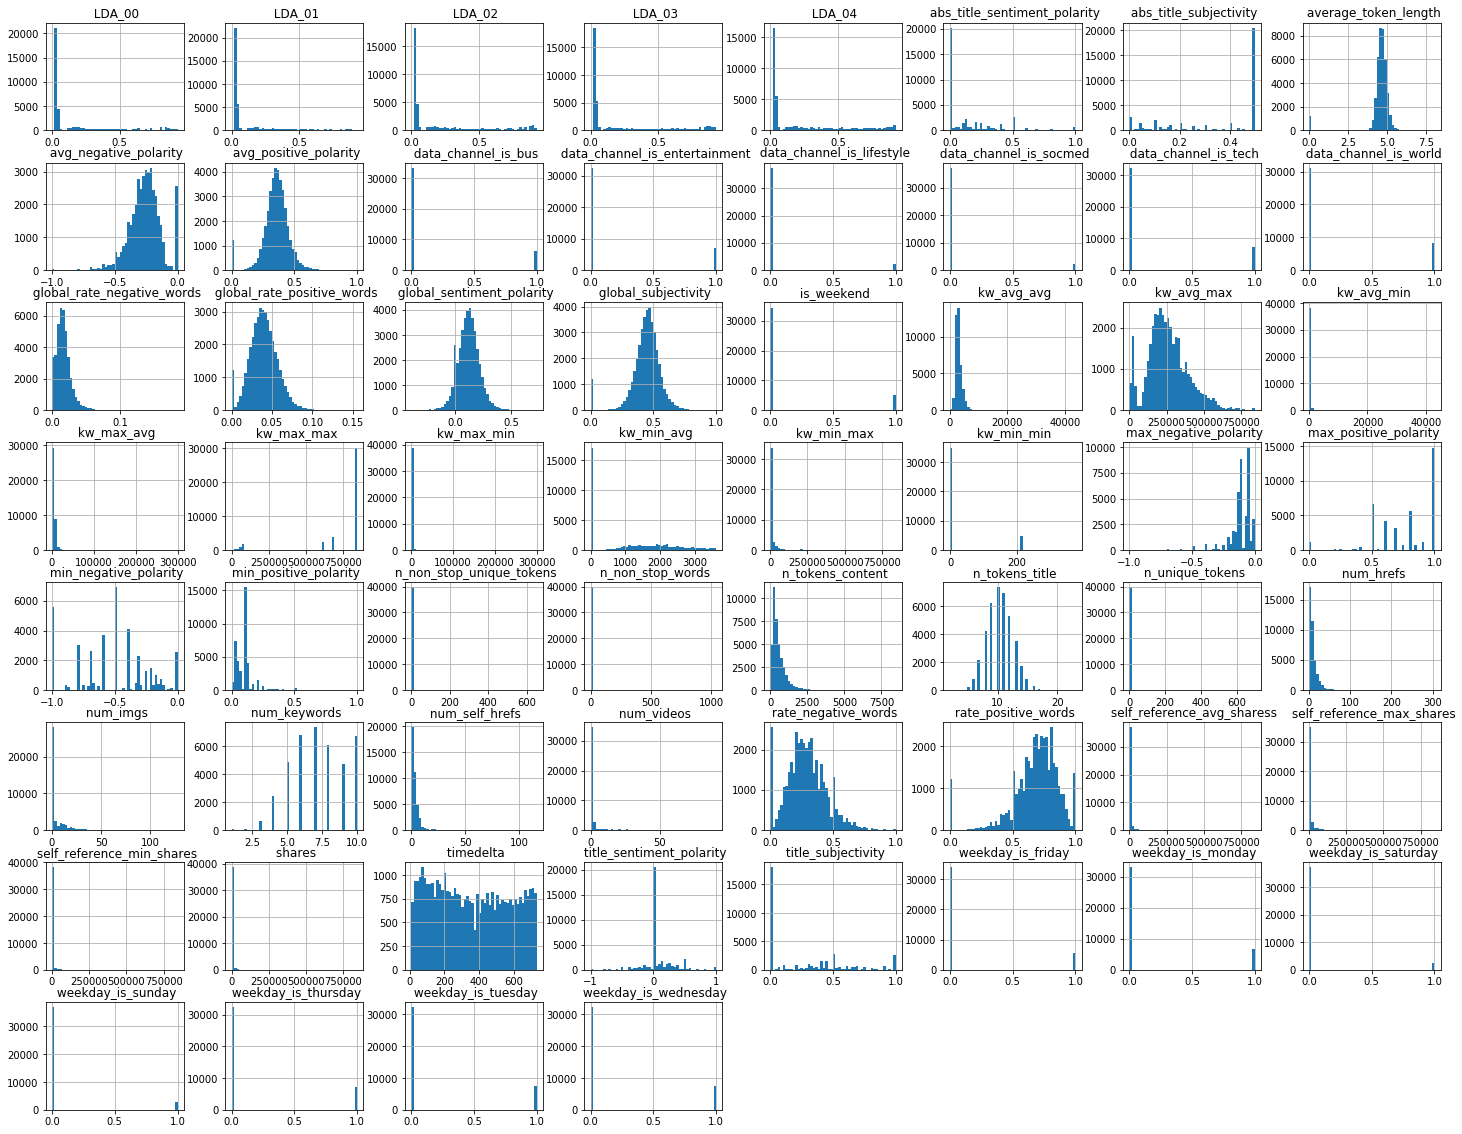

In [64]:
df.hist(bins=50, figsize=(25,20))

Using the above we choose the columns which seem to show a nonrandom distribution, and keep those in our dataframe<br>
We thus choose to keep the features indicated below

For creating this list we realize that the provided data has spaces after each column title, as shown below<br>

In [65]:
list(df)

['url',
 ' timedelta',
 ' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' LDA_04',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_

Below we remove this blank space from all column titles, thus making it much easier to reference these features

In [66]:
df.columns = df.columns.str.replace(' ', '')

This is the list of features which we have decided to keep within our model

In [67]:
keep_list = ['average_token_length','avg_negative_polarity','avg_positive_polarity',
             'global_rate_negative_words','global_rate_positive_words','global_sentiment_polarity',
             'global_subjectivity','kw_avg_avg','kw_avg_max','kw_min_avg','kw_min_max','max_negative_polarity',
             'min_negative_polarity','min_positive_polarity','n_tokens_content','n_tokens_title','num_hrefs',
             'num_keywords','num_imgs','num_self_hrefs','rate_negative_words','rate_positive_words',
             'title_sentiment_polarity','title_subjectivity','num_videos','shares']

Here we create a new dataframe, keeping only those indicated features

In [68]:
df1=df[keep_list]

In [69]:
df1.head()

,average_token_length,avg_negative_polarity,avg_positive_polarity,global_rate_negative_words,global_rate_positive_words,global_sentiment_polarity,global_subjectivity,kw_avg_avg,kw_avg_max,kw_min_avg,...,num_hrefs,num_keywords,num_imgs,num_self_hrefs,rate_negative_words,rate_positive_words,title_sentiment_polarity,title_subjectivity,num_videos,shares
0,4.680365,-0.350000,0.378636,0.013699,0.045662,0.092562,0.521617,0.0,0.0,0.0,...,4.0,5.0,1.0,2.0,0.230769,0.769231,-0.187500,0.500000,0.0,593
1,4.913725,-0.118750,0.286915,0.015686,0.043137,0.148948,0.341246,0.0,0.0,0.0,...,3.0,4.0,1.0,1.0,0.266667,0.733333,0.000000,0.000000,0.0,711
2,4.393365,-0.466667,0.495833,0.009479,0.056872,0.323333,0.702222,0.0,0.0,0.0,...,3.0,6.0,1.0,1.0,0.142857,0.857143,0.000000,0.000000,0.0,1500
3,4.404896,-0.369697,0.385965,0.020716,0.041431,0.100705,0.429850,0.0,0.0,0.0,...,9.0,7.0,1.0,0.0,0.333333,0.666667,0.000000,0.000000,0.0,1200
4,4.682836,-0.220192,0.411127,0.012127,0.074627,0.281003,0.513502,0.0,0.0,0.0,...,19.0,7.0,20.0,19.0,0.139785,0.860215,0.136364,0.454545,0.0,505


Looks like only the chosen columns were kept<br>
Now we make a histogram of the remaining columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a34d65048>,
      dtype=object)

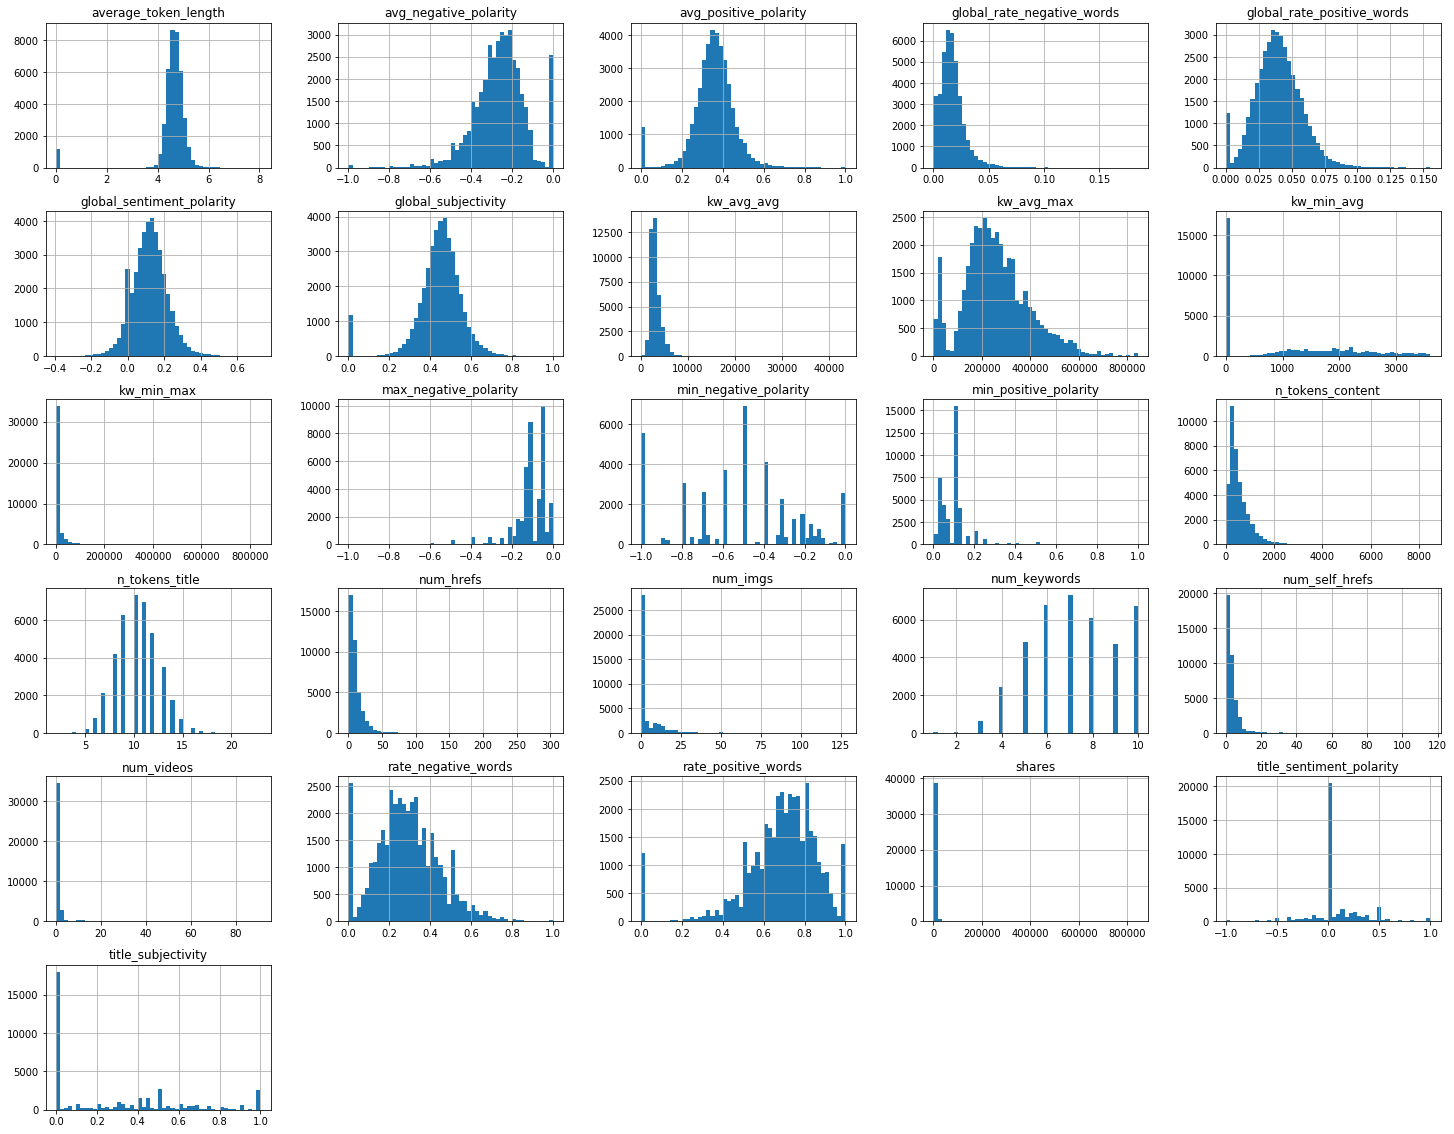

In [70]:
df1.hist(bins=50, figsize=(25,20))

And here is the histogram for our target, shares

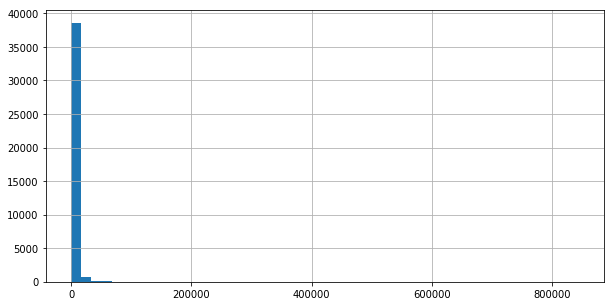

In [71]:
df1['shares'].hist(bins=50, figsize=(10,5))

We now look at the description for our new dataframe

In [72]:
df1.describe()

,average_token_length,avg_negative_polarity,avg_positive_polarity,global_rate_negative_words,global_rate_positive_words,global_sentiment_polarity,global_subjectivity,kw_avg_avg,kw_avg_max,kw_min_avg,...,num_hrefs,num_keywords,num_imgs,num_self_hrefs,rate_negative_words,rate_positive_words,title_sentiment_polarity,title_subjectivity,num_videos,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,4.548239,-0.259524,0.353825,0.016612,0.039625,0.119309,0.443370,3135.858639,259281.938083,1117.146610,...,10.883690,7.223767,4.544143,3.293638,0.287934,0.682150,0.071425,0.282353,1.249874,3395.380184
std,0.844406,0.127726,0.104542,0.010828,0.017429,0.096931,0.116685,1318.150397,135102.247285,1137.456951,...,11.332017,1.909130,8.309434,3.855141,0.156156,0.190206,0.265450,0.324247,4.107855,11626.950749
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,-1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,4.478404,-0.328383,0.306244,0.009615,0.028384,0.057757,0.396167,2382.448566,172846.875000,0.000000,...,4.000000,6.000000,1.000000,1.000000,0.185185,0.600000,0.000000,0.000000,0.000000,946.000000
50%,4.664082,-0.253333,0.358755,0.015337,0.039023,0.119117,0.453457,2870.074878,244572.222223,1023.635611,...,8.000000,7.000000,1.000000,3.000000,0.280000,0.710526,0.000000,0.150000,0.000000,1400.000000
75%,4.854839,-0.186905,0.411428,0.021739,0.050279,0.177832,0.508333,3600.229564,330980.000000,2056.781032,...,14.000000,9.000000,4.000000,4.000000,0.384615,0.800000,0.150000,0.500000,1.000000,2800.000000
max,8.041534,0.000000,1.000000,0.184932,0.155488,0.727841,1.000000,43567.659946,843300.000000,3613.039820,...,304.000000,10.000000,128.000000,116.000000,1.000000,1.000000,1.000000,1.000000,91.000000,843300.000000


Note that URL was the only categorical column in our original dataframe.<br>
In the previous investigation this was not included in our new dataframe, as of course there wasn't even a histogram which could be created for it.<br>

In [73]:
# Include folliwng list in examining the counts for values
print_col=['shares','average_token_length','avg_negative_polarity','avg_positive_polarity',
           'global_rate_negative_words']

Below we print out the frequency of which every value under a given column title occurs.<br>

In [74]:
for col in df1[print_col]:
    print('\nColumn Name:', col,)
    print(df1[col].value_counts())


Column Name: shares
1100      2308
1200      2018
1300      1740
1400      1592
1500      1323
1000      1177
1600      1137
1700      1013
1800       889
1900       810
2000       774
2100       661
2200       631
2300       511
2400       506
2600       442
2500       441
2700       435
2800       359
2900       356
3000       348
3100       306
3200       282
3400       271
3300       259
3500       252
3800       240
3600       233
3700       223
3900       200
          ... 
38400        1
139500       1
168          1
104          1
53           1
295          1
72100        1
92600        1
309          1
51500        1
277          1
43200        1
39700        1
149          1
67700        1
85           1
59400        1
8            1
80800        1
75600        1
34500        1
50700        1
42400        1
66900        1
72900        1
197600       1
310800       1
92           1
57800        1
82200        1
Name: shares, Length: 1454, dtype: int64

Column Name: average_t

Here zero entries are not missing data. They are important as it means the article was not shared.<br>
Zero entries will therefore not be removed. However, missing data will be removed.

Below we remove all rows from the dataframe which have missing data for the column num_videos

In [75]:
df.dropna()
print('Before removing missing videos we had %d rows in the videos column' %df['num_videos'].shape)
df2 = df1[df1['num_videos']>0]
print('After removing missing videos we had %d rows in the videos column' %df2['num_videos'].shape)

Before removing missing videos we had 39644 rows in the videos column
After removing missing videos we had 14618 rows in the videos column


We see that corresponding rows were indeed removed.<br>
We now examine the shares column after removing these rows corresponding to missing video information by looking at its statistics.

In [76]:
df2['shares'].describe()

count     14618.000000
mean       4258.072650
std       17104.743922
min           1.000000
25%         965.000000
50%        1500.000000
75%        3100.000000
max      843300.000000
Name: shares, dtype: float64

Now look at the counts for our target column

In [77]:
df2['shares'].value_counts()

1100      827
1200      714
1300      615
1400      575
1500      472
1000      430
1600      377
1700      346
1800      325
2000      288
1900      281
2100      249
2200      223
2300      188
2400      176
2600      157
2700      151
2500      144
3000      132
2800      120
2900      117
3400      109
3500       99
3100       97
3200       97
3300       96
3600       92
3800       90
3700       85
3900       72
         ... 
476         1
57800       1
28300       1
44700       1
412         1
36600       1
404         1
44100       1
197600      1
43200       1
50700       1
85          1
43000       1
100300      1
108400      1
67300       1
50900       1
32299       1
67100       1
34300       1
115700      1
42400       1
83300       1
34100       1
109500      1
441000      1
58400       1
42000       1
25600       1
84          1
Name: shares, Length: 1161, dtype: int64

Now plot the target column (shares)

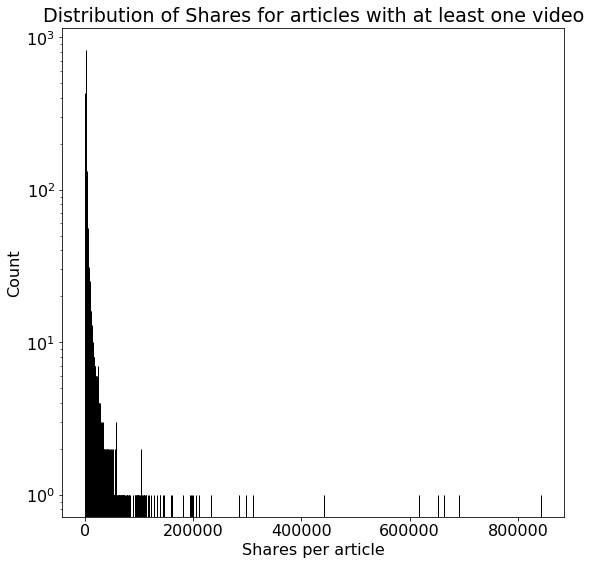

In [78]:
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (9, 9)

# Bar plot of grades
plt.bar(df2['shares'].value_counts().index, 
        df2['shares'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Shares per article'); 
plt.ylabel('Count'); 
plt.title('Distribution of Shares for articles with at least one video');
plt.yscale("log") # Log scale so we can better see the distribution (low counts were near-invisible before)

Below we will examine this target column a different way.<br>
We will calculate the percentile of each share value, and plot this against the number of shares

/Users/bryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


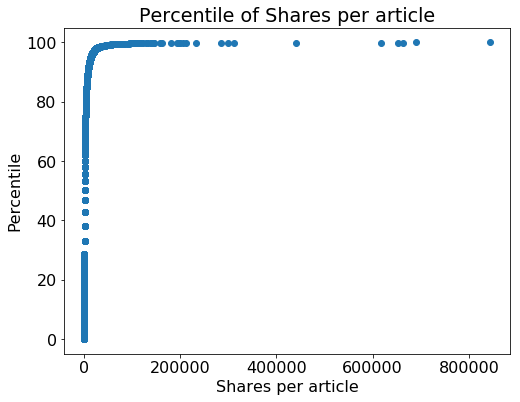

In [79]:
# Scipy helper functions
from scipy.stats import percentileofscore

# Calculate percentile for grades
df2['percentile'] = df2['shares'].apply(lambda x: percentileofscore(df2['shares'], x))

# Plot percentiles for grades
plt.figure(figsize = (8, 6))

plt.plot(df2['shares'], df2['percentile'], 'o')

#plt.xticks(range(0, 20, 2), range(0, 20, 2))

plt.xlabel('Shares per article'); 
plt.ylabel('Percentile'); 
plt.title('Percentile of Shares per article');

So we see that it seems to be a very small group of highly shared articles which contain most of the shares. The vast majority of articles, even if there are a lot with the same number of shares, contribute very little.<br>
This same trend can also be seen from the plot above this one, but it is useful to examine this using percentile as well.

We now look for how correlated each feature is with the target feature.

In [80]:
df2.corr()['shares'].sort_values(ascending=False)

shares                        1.000000
percentile                    0.286180
kw_avg_avg                    0.082609
kw_avg_max                    0.053050
kw_min_avg                    0.029168
num_hrefs                     0.028170
n_tokens_title                0.020261
num_imgs                      0.018855
global_subjectivity           0.015889
num_keywords                  0.012326
title_subjectivity            0.006119
title_sentiment_polarity      0.004772
global_sentiment_polarity     0.003004
kw_min_max                    0.002171
num_videos                    0.001659
min_negative_polarity        -0.000060
avg_positive_polarity        -0.001980
global_rate_positive_words   -0.003418
rate_positive_words          -0.006068
global_rate_negative_words   -0.006330
min_positive_polarity        -0.006755
num_self_hrefs               -0.006941
n_tokens_content             -0.007204
rate_negative_words          -0.011305
average_token_length         -0.013480
avg_negative_polarity    

Let us choose to make a scatter matrix with the top eight most correlated features (using absolute value of correlation score)

In [81]:
keep_att=["shares", "percentile", "kw_avg_avg", "kw_avg_max", "kw_min_avg", "num_hrefs","max_negative_polarity",
          "avg_negative_polarity"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3ca7e8d0>,
      dtype=object)

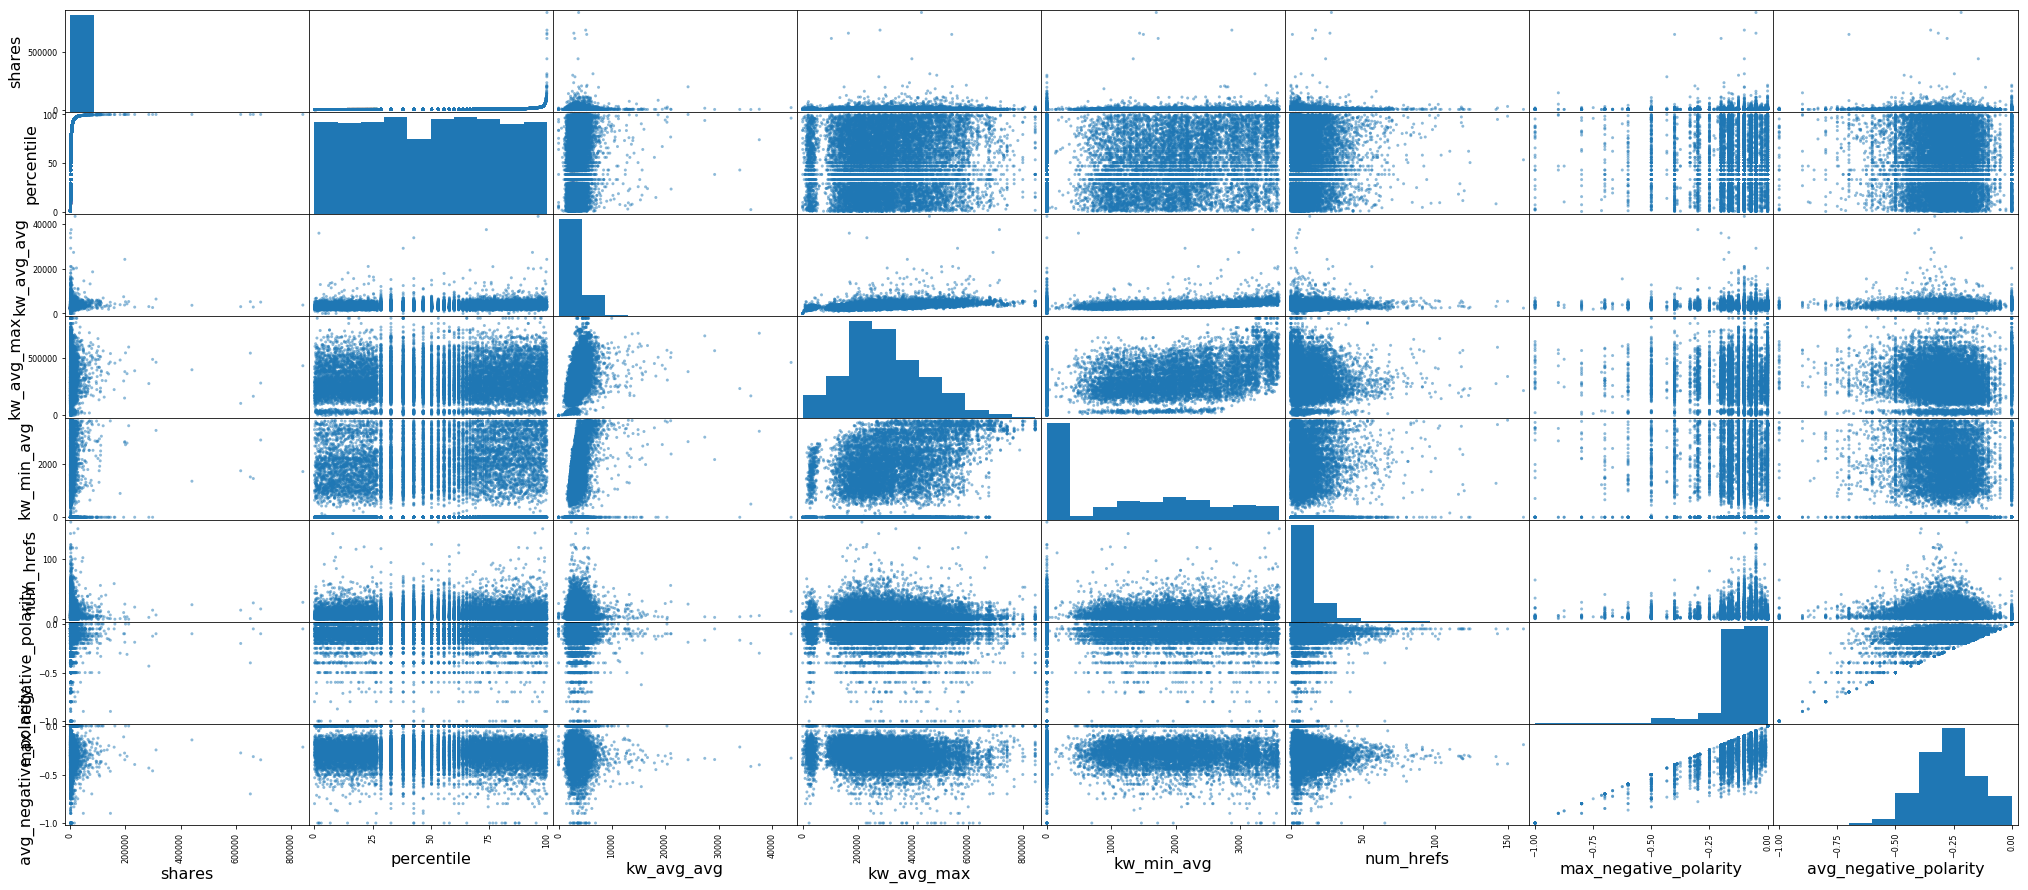

In [82]:
scatter_matrix(df2[keep_att], figsize=(35, 15))

None of these seem to covary with shares, except for percentile (which makes sense as it was created directly from shares).<br>
We examine this relationship below.

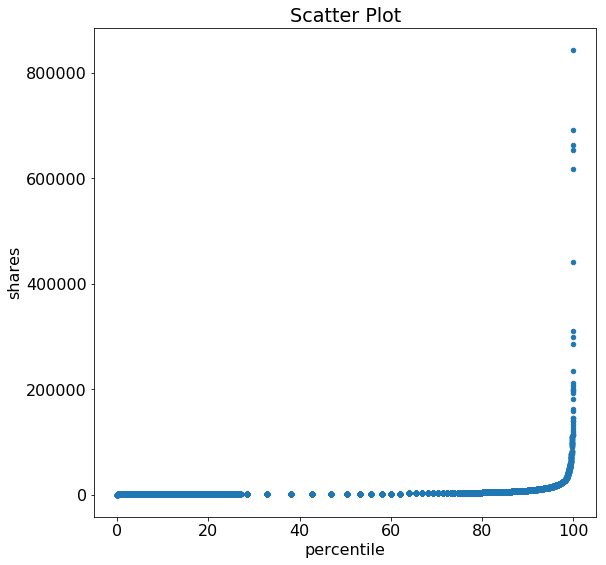

In [83]:
df2.plot(title="Scatter Plot", kind="scatter", x="percentile", y="shares")

I will also more closely examine the feature kw_avg_max

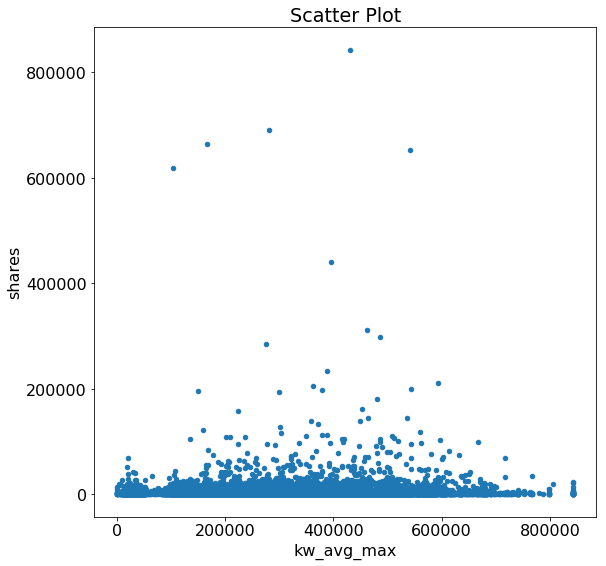

In [84]:
df2.plot(title="Scatter Plot", kind="scatter", x="kw_avg_max", y="shares")

I don't see anything making me think this has a strong covariance with shares.

I will now better take into account features which contain boolean values.<br>
To do this I will perform one-hot encodingon our dataframe.<br>
I will go back to using the entire dataframe, without removing features. The only feature I will remove is URL.<br>
I will still remove all entries with missing video counts from the full dataframe.

In [85]:
# Remove URL column from main dataframe
df=df.drop('url',axis=1)

In [86]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Below I have identified the boolean features as 'is_weekend', 'data_channel_is_entertainment', and 'data_channel_is_tech'.<br>
The values in each of these columns will be converted from numbers to strings<br>
I then remove the entries with missing values for num_videos

In [87]:
# First convert binary columns to string
df1['is_weekend'] = df['is_weekend'].apply(lambda x: str(x))
df1['data_channel_is_entertainment'] = df['data_channel_is_entertainment'].apply(lambda x: str(x))
df1['data_channel_is_tech'] = df['data_channel_is_tech'].apply(lambda x: str(x))

# Remove rows without videos in articles
df1 = df1[df1['num_videos']>0]

# Create dataframe with only those chosen columns
category_df = df1.select_dtypes('object')

Below we perform one-hot encoding to split these binary categories into separate columns, with each containing only 1's for when they are true<br>
We also put back the shares column so we can better compare with these one-hot encoded columns

In [88]:
# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the grade back in the dataframe
dummy_df['shares'] = df2['shares']

dummy_df.head()

,is_weekend_0.0,is_weekend_1.0,data_channel_is_entertainment_0.0,data_channel_is_entertainment_1.0,data_channel_is_tech_0.0,data_channel_is_tech_1.0,shares
9,1,0,1,0,1,0,710
13,1,0,1,0,1,0,10000
16,1,0,1,0,1,0,13600
21,1,0,1,0,1,0,598
30,1,0,1,0,1,0,3200


Below we look for correlations between shares and these one hot encoded columns

In [89]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['shares'].sort_values(ascending=False)

shares                               1.000000
data_channel_is_entertainment_0.0    0.031668
data_channel_is_tech_0.0             0.006799
is_weekend_1.0                       0.003231
is_weekend_0.0                      -0.003231
data_channel_is_tech_1.0            -0.006799
data_channel_is_entertainment_1.0   -0.031668
Name: shares, dtype: float64

The one-hot encoded attributes do not seem to be too correlated. <br>
For a full comparison we will merge these one-hot encoded features with our original dataframe.

In [90]:
# Remove shares column from dummy_df before concatenating
dummy_df=dummy_df.drop('shares',axis=1)
# Concatenate dataframes
df_final=pd.concat([df1, dummy_df],axis=1)
df_final.head()

,average_token_length,avg_negative_polarity,avg_positive_polarity,global_rate_negative_words,global_rate_positive_words,global_sentiment_polarity,global_subjectivity,kw_avg_avg,kw_avg_max,kw_min_avg,...,shares,is_weekend,data_channel_is_entertainment,data_channel_is_tech,is_weekend_0.0,is_weekend_1.0,data_channel_is_entertainment_0.0,data_channel_is_entertainment_1.0,data_channel_is_tech_0.0,data_channel_is_tech_1.0
9,5.090909,-0.238095,0.298413,0.030303,0.038961,0.051852,0.313889,0.0,0.0,0.0,...,710,0.0,0.0,0.0,1,0,1,0,1,0
13,4.343860,-0.337889,0.457500,0.052632,0.028070,-0.053085,0.509744,0.0,0.0,0.0,...,10000,0.0,0.0,0.0,1,0,1,0,1,0
16,4.703936,-0.401437,0.504529,0.025939,0.041145,0.056379,0.579630,0.0,0.0,0.0,...,13600,0.0,0.0,0.0,1,0,1,0,1,0
21,5.296675,-0.108333,0.150000,0.005115,0.017903,0.033333,0.284211,0.0,0.0,0.0,...,598,0.0,0.0,0.0,1,0,1,0,1,0
30,4.620056,-0.244444,0.291941,0.015537,0.055085,0.138939,0.491428,0.0,0.0,0.0,...,3200,0.0,0.0,0.0,1,0,1,0,1,0


To investigate this full dataframe we will examine the correlations (with shares) for the top 8 most correlated features.

In [91]:
# Keep 8 most highly correlated attributes
# most_correlated = df_final.corr().abs()['shares']
most_correlated = df_final.corr().abs()['shares'].sort_values(ascending=False)
most_correlated = most_correlated[:8]
print("Most Correlated Features:\n")
print(most_correlated)

Most Correlated Features:

shares                               1.000000
kw_avg_avg                           0.082609
kw_avg_max                           0.053050
data_channel_is_entertainment_0.0    0.031668
data_channel_is_entertainment_1.0    0.031668
kw_min_avg                           0.029168
num_hrefs                            0.028170
max_negative_polarity                0.024002
Name: shares, dtype: float64


In [92]:
print("Most Correlated Index: ", most_correlated.index)

# Edit the DataFrame to Contain Only the Most Correlated Features¶
df_corr = df_final.loc[:,most_correlated.index]
# Remove data_channel_is_entertainment_0.0 as same correlation as data_channel_is_entertainment_1.0
df_corr=df_corr.drop('data_channel_is_entertainment_0.0',axis=1)
# df_corr = df_final.ix[:, most_correlated.index]
df_corr.head()

Most Correlated Index:  Index(['shares', 'kw_avg_avg', 'kw_avg_max',
       'data_channel_is_entertainment_0.0',
       'data_channel_is_entertainment_1.0', 'kw_min_avg', 'num_hrefs',
       'max_negative_polarity'],
      dtype='object')


,shares,kw_avg_avg,kw_avg_max,data_channel_is_entertainment_1.0,kw_min_avg,num_hrefs,max_negative_polarity
9,710,0.0,0.0,0,0.0,4.0,-0.10
13,10000,0.0,0.0,0,0.0,4.0,-0.10
16,13600,0.0,0.0,0,0.0,26.0,-0.05
21,598,0.0,0.0,0,0.0,9.0,-0.05
30,3200,0.0,0.0,0,0.0,8.0,-0.05


Below we use Seaborn to examine the correlations and covariances with these 8 most highly correlated features with our target (shares)

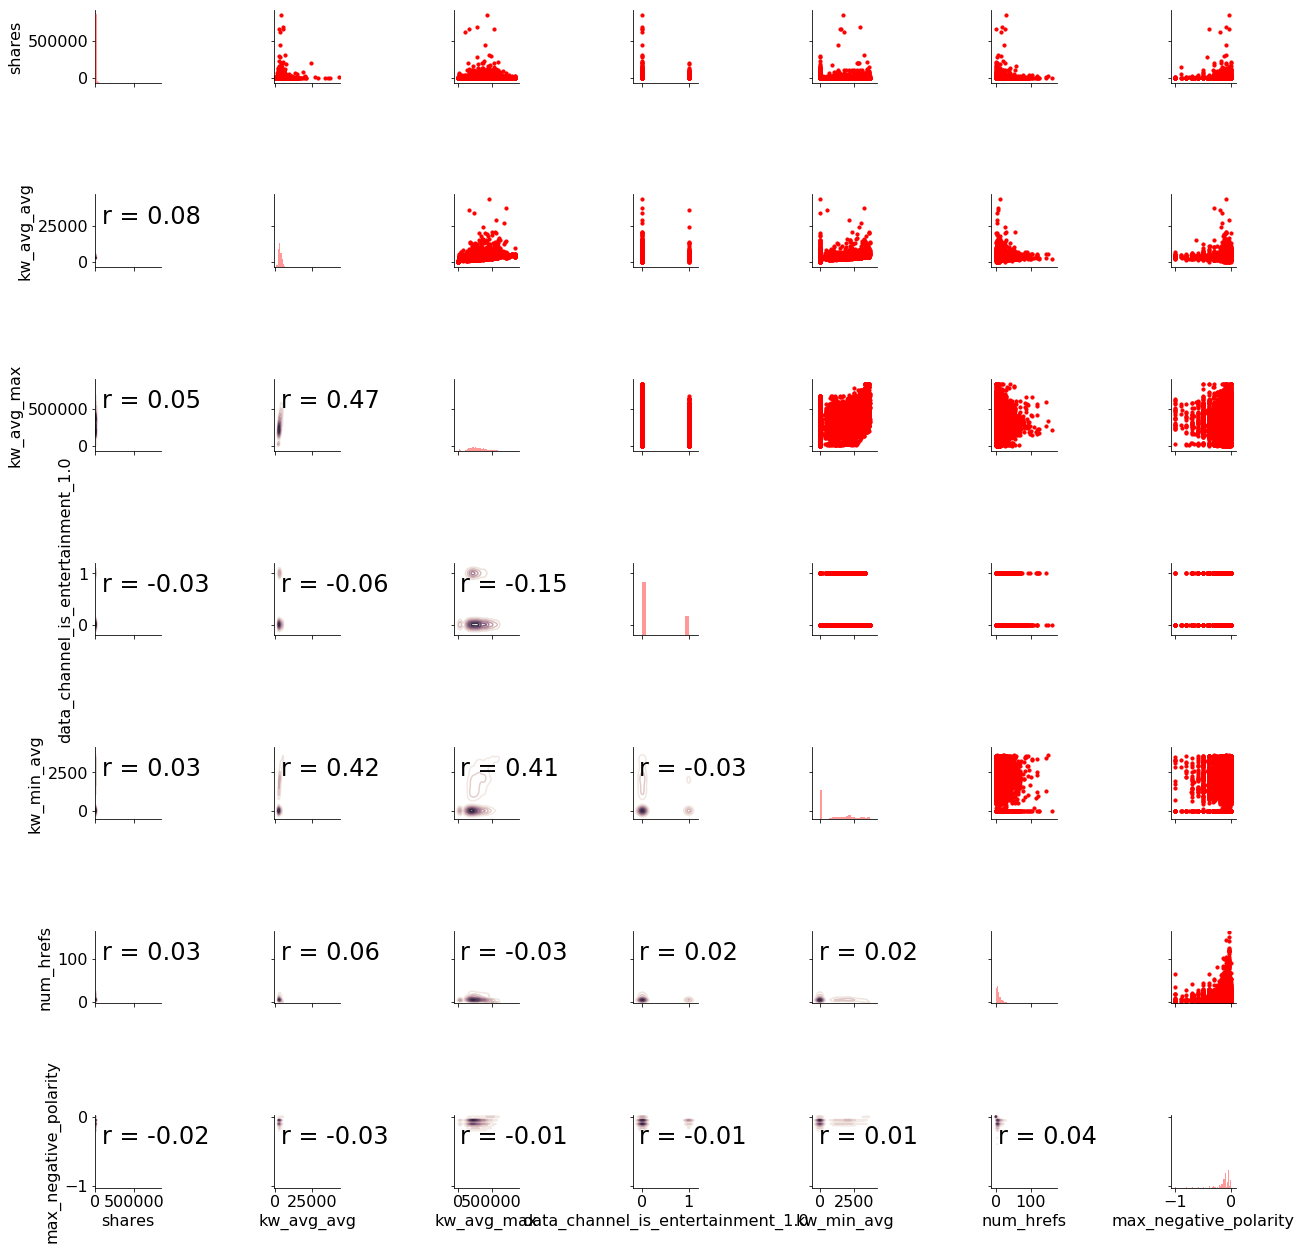

In [93]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df_corr)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

Now we will use these 8 most highly correlated features to fit our linear model<br>
This is acceptable as the correlation/covariance between these features does not appear too severe.

Below we split shares into its own vector and keep the remaining features in our feature matrix

In [94]:
allData = df_corr
y = df_corr['shares'] # 1D targer vector
X = df_corr.drop(columns='shares')  # Data Matrix containing all features excluding the target
allData.head()

,shares,kw_avg_avg,kw_avg_max,data_channel_is_entertainment_1.0,kw_min_avg,num_hrefs,max_negative_polarity
9,710,0.0,0.0,0,0.0,4.0,-0.10
13,10000,0.0,0.0,0,0.0,4.0,-0.10
16,13600,0.0,0.0,0,0.0,26.0,-0.05
21,598,0.0,0.0,0,0.0,9.0,-0.05
30,3200,0.0,0.0,0,0.0,8.0,-0.05


We now create Test and Train Data Sets, keeping 20% of data aside for testing

In [95]:
from sklearn.model_selection import train_test_split

# Split into training/testing sets with 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

Below is a function we will use to calculate the MAE and RMSE

In [96]:
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

Below we use the median value for our training set as a naive baseline which we will use for comparison.<br>
This essentially just calculates what the MAE and RMSE would be if we used a fit of just the median value.

In [97]:
median_pred = y_train.median()

print(median_pred)

median_preds = [median_pred for _ in range(len(y_test))]
true = y_test

# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

1500.0
Median Baseline  MAE: 3120.1436
Median Baseline RMSE: 20317.8382


Below we use the built-in models from SciKit Learn to create our model, using a polynomial regression.

In [98]:
# Create linear regression object
model = LinearRegression()

# Train the model using the traing data and label
model.fit(X_train, y_train)

# The intercept
b = model.intercept_
print('Intercept: \n',b )

# The feature weights (coefficients) in an array
m = model.coef_
print('Coefficients: \n', m)

# Show the prediction formula with the intercept and feature weight values
print("\nPrediction Formula: ")
print(' y(predicted) = {0} +  x_1 * {1} +  x_2 * {2} + x_3 * {3} + x_4 * {4} + x_5 * {5} + x_6 * {6}'
      .format(b, m[0], m[1], m[2], m[3], m[4], m[5]))

# Make predictions using the test data
y_predicted = model.predict(X_test)

# RMSE of the model
print("\nMean squared error: %.2f"
      % mean_squared_error(y_test, y_predicted))

# Explained variance score: 1 is perfect prediction
print('\nCoefficient of determination r^2 variance score [1 is perfect prediction]: %.2f' % r2_score(y_test, y_predicted))

Intercept: 
 182.7865654612251
Coefficients: 
 [ 7.91056311e-01  3.81170000e-03 -7.71197083e+02 -2.72062051e-01
  3.07287899e+01 -4.32112149e+03]

Prediction Formula: 
 y(predicted) = 182.7865654612251 +  x_1 * 0.7910563113463163 +  x_2 * 0.003811700000595512 + x_3 * -771.1970831780055 + x_4 * -0.2720620512224752 + x_5 * 30.728789921172467 + x_6 * -4321.121488053269

Mean squared error: 404160007.38

Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.00


From the above we can see that a polynomial model is not a good fit for our dataset.<br>
Below we consider a linear fit.

In [99]:
# Model Metrics
mae = np.mean(abs(y_predicted - y_test))
rmse = np.sqrt(np.mean((y_predicted - y_test) ** 2))

print("Linear Regression MAE: ", mae)
print("Linear Regression RMSE: ", rmse)


# Baseline Metrics
baseline = np.median(y_train)
baseline_mae = np.mean(abs(baseline - y_test))
baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))


print("\nBaseline MAE: ", baseline_mae)
print("Baseline RMSE: ", baseline_rmse)

Linear Regression MAE:  4211.889035393957
Linear Regression RMSE:  20103.731180507686

Baseline MAE:  3120.143638850889
Baseline RMSE:  20317.83824564169


We see that we are very slightly improved on the root mean squared error, but that the MAE is actually higher. I think it's certainly fair to say that a linear regression model is not a good fit for this data, at least using our chosen features.<br>
This would need to be investigated further.